# One-Dimensional Speckle Generation

**Scott Prahl**

**May 2020**

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

import pyspeckle

## To install `pyspeckle`, copy the following into a new cell in Jupyter and execute
#
#!{sys.executable} -m pip install pyspeckle

def autocorr(x):
    """
    Find the autocorrelation of the array x
    
    This is a little different from the standard autocorrelation because 
    (1) the mean is subtracted before correlation
    (2) the autocorrelation is normalized to maximum value
    (3) only the right hand side of the symmetric function is returned
    """    
    mean = np.mean(x)
    x -= mean
    result = np.correlate(x, x, mode='full')
# could also use the faster(?)
#   result = signal.fftconvolve(sig, sig[::-1], mode='full')

    mx = np.max(result)
    middle = len(result)//2
    return result[middle:]/mx

## Exponential autocorrelation generation

Generate a speckle pattern with a specific average and standard deviation, but also with an exponentially decaying autocorrelation function.

### Tests for average and standard deviation of the speckle

Here we just make sure that the average and standard deviation of the speckle array is correct.

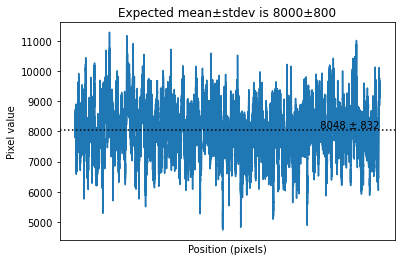

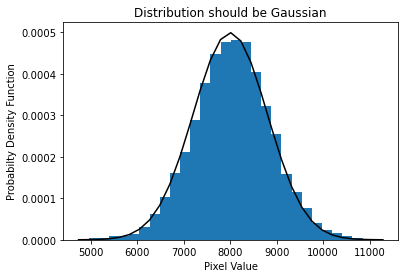

In [2]:
M     = 200000 # number of pixels in speckle realization
cl    = 300    # correlation length in pixels
avg   = 8000   # average value of speckle
stdev = 800    # standard deviation of pixel values

y = pyspeckle.create_exp_1D(M,avg,stdev,cl)

ave = np.mean(y)
std = np.sqrt(np.var(y))

plt.plot(y)
plt.axhline(ave, ls=':', color='black')
plt.text(M, ave, "  %.0f ± %.0f"%(ave,std), ha='right', va='bottom')
plt.title("Expected mean±stdev is %.0f±%0.f" % (avg,stdev))
plt.xlabel('Position (pixels)')
plt.ylabel('Pixel value')
plt.xticks([])
plt.show()

count, bins, ignored = plt.hist(y, 30, density=True)
plt.plot(bins,  1/(stdev * np.sqrt(2 * np.pi)) * np.exp(-0.5*((bins-avg)/stdev)**2),'k')
plt.xlabel("Pixel Value")
plt.ylabel("Probabilty Density Function")
plt.title("Distribution should be Gaussian")
plt.show()

Repeat for several 1D speckle realizations

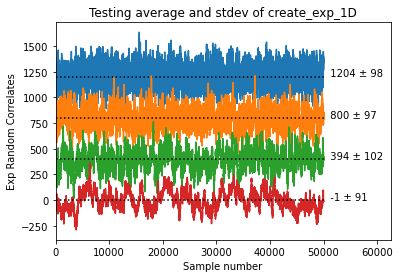

In [3]:
M=50000
stdev=100

avg=1200
y = pyspeckle.create_exp_1D(M,avg,stdev,20)
ave = np.mean(y)
std = np.sqrt(np.var(y))
plt.annotate("  %.0f ± %.0f"%(ave,std),xy=(M,ave))
plt.plot(y)
plt.plot([0,M],[avg,avg],':k')

avg=800
y = pyspeckle.create_exp_1D(M,avg,stdev,50)
ave = np.mean(y)
std = np.sqrt(np.var(y))
plt.annotate("  %.0f ± %.0f"%(ave,std),xy=(M,ave))
plt.plot(y)
plt.plot([0,M],[avg,avg],':k')

avg=400
y = pyspeckle.create_exp_1D(M,avg,stdev,100)
ave = np.mean(y)
std = np.sqrt(np.var(y))
plt.annotate("  %.0f ± %.0f"%(ave,std),xy=(M,ave))
plt.plot(y)
plt.plot([0,M],[avg,avg],':k')

avg=0
y = pyspeckle.create_exp_1D(M,avg,stdev,500)
ave = np.mean(y)
std = np.sqrt(np.var(y))
plt.annotate("  %.0f ± %.0f"%(ave,std),xy=(M,ave))
plt.plot(y)
plt.plot([0,M],[avg,avg],':k')

plt.xlim(0,M*1.25)
plt.title("Testing average and stdev of create_exp_1D")
plt.xlabel('Sample number')
plt.ylabel('Exp Random Correlates')
plt.show()

## Validate autocorrelation shape

The points should be distributed so that the autocorrelation is a decaying exponential
$$
\langle X,X\rangle = \exp\left(-\frac{x}{\tau}\right)
$$
This is normalized to unity when the offset is zero.

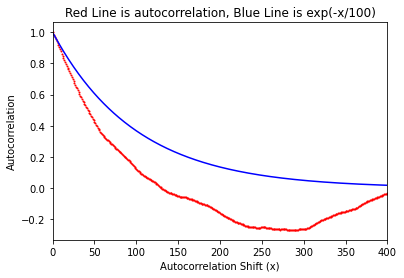

In [4]:
M= 5000
cl = 100

x = np.linspace(1,M+1,M)
y = pyspeckle.create_exp_1D(M,200,100,cl)

ac = autocorr(y)
plt.plot(x,ac,'ro',markersize=1)

plt.xlim(0,4*cl)
plt.plot(x,np.exp(-x/cl),color='blue')

plt.title(r"Red Line is autocorrelation, Blue Line is exp(-x/%.0f)" % cl)
plt.xlabel('Autocorrelation Shift (x)')
plt.ylabel('Autocorrelation')

plt.show()

## Speckle with Gaussian autocorrelation

This seems to work nicely.  To match theory, the speckle realization should be much longer than the correlation length `cl` (perhaps by a factor of 50).

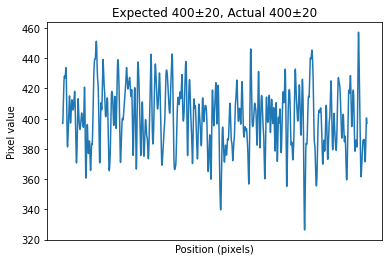

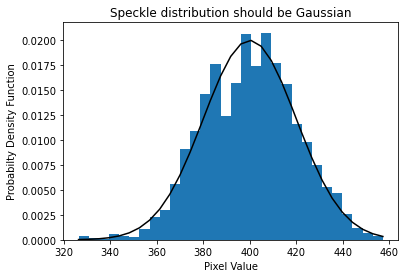

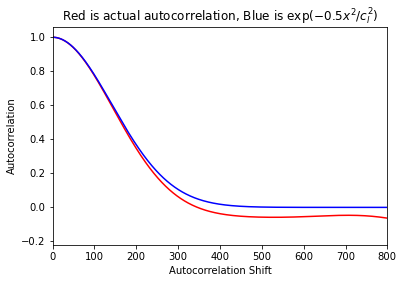

In [5]:
M=50000
x=np.linspace(0,M-1,M)
stdev= 20
avg = 400
cl = 200

y = pyspeckle.create_gaussian_1D(M,avg,stdev,cl)
ave = np.mean(y)
std = np.sqrt(np.var(y))
plt.plot(y)
plt.title("Expected %.0f±%0.f, Actual %.0f±%0.f" % (avg,stdev,ave,std))
plt.xlabel('Position (pixels)')
plt.ylabel('Pixel value')
plt.xticks([])
plt.show()

count, bins, ignored = plt.hist(y, 30, density=True)
plt.plot(bins,  1/(stdev * np.sqrt(2 * np.pi)) * np.exp(-0.5*((bins-avg)/stdev)**2),'k')
plt.xlabel("Pixel Value")
plt.ylabel("Probabilty Density Function")
plt.title("Speckle distribution should be Gaussian")
plt.show()

ac = autocorr(y)
plt.plot(x,ac,color='red')

plt.xlim(0,4*cl)
plt.plot(x,np.exp(-0.5*x**2/(cl**2/2)),color='blue')

plt.title(r"Red is actual autocorrelation, Blue is $\exp(-0.5x^2/c_l^2)$")
plt.xlabel('Autocorrelation Shift')
plt.ylabel('Autocorrelation')

plt.show()